# Introduction

This is a brief introduction to **skrf**.  The intended audience are those who have a working python stack, and are somewhat familiar with python. If you are completely  new to  python,  see scipy's [Getting Started](http://www.scipy.org/Getting_Started)

In [108]:
import skrf as rf

If this produces an error, please see the :doc:`installation` tutorial.

## Networks

The [Network][Network]  object represents a N-port microwave network. 
A [Network][Network] can be created in a number of ways, one way is from data stored in a touchstone file.

[Network]: ../reference/network.rst

In [1]:
ring_slot = rf.Network('data/ring slot.s2p')

If you cant find `ring slot.s2p`, then just import it form `skrf.data`. 


In [2]:
from skrf.data import ring_slot

A short description of the network will be printed out if entered onto the command line

In [3]:
ring_slot

2-Port Network: 'ring slot',  75-110 GHz, 201 pts, z0=[ 50.+0.j  50.+0.j]

The basic attributes of a microwave :class:`Network` are provided by the 
following properties

All of the network parameters are complex :class:`numpy.ndarray` 's of shape *FxNxN*, where *F* is the number of frequency points and *N* is the number of ports. The :class:`Network` object has numerous other properties and methods which can found in the :class:`Network` docstring. If you are using IPython, then these properties and methods can be 'tabbed' out on the command line. 


	In [1]: short.s<TAB>
	rf.data.line.s              rf.data.line.s_arcl         rf.data.line.s_im
	rf.data.line.s11            rf.data.line.s_arcl_unwrap  rf.data.line.s_mag
	...

### Linear Operations 

	
Element-wise mathematical operations on the scattering parameter matrices are accessible through overloaded operators. To illustrate their usage, load a couple  Networks stored in the ``data`` module. 

In [89]:
short = rf.data.wr2p2_short

In [90]:
delayshort = rf.data.wr2p2_delayshort
short - delayshort

1-Port Network: 'wr2p2,short',  330-500 GHz, 201 pts, z0=[ 50.+0.j]

In [91]:
short + delayshort

1-Port Network: 'wr2p2,short',  330-500 GHz, 201 pts, z0=[ 50.+0.j]

### Cascading and De-embedding

Cascading and de-embeding 2-port Networks can also be done though operators. The :func:`cascade` function can be called through the power operator,  ``**``. To calculate a new network which is the cascaded connection of the two individual Networks ``line`` and ``short``, 

In [92]:
short = rf.data.wr2p2_short
line = rf.data.wr2p2_line
delayshort = line ** short

De-embedding  can be accomplished by cascading the *inverse* of a network. The inverse of a network is accessed through the property :attr:`Network.inv`. To de-embed the ``short`` from ``delay_short``,

In [93]:
short = line.inv ** delayshort

For more information on the functionality provided by the :class:`Network` object, such as interpolation, stitching, n-port connections, and IO support see the   :doc:`networks` tutorial.

## Plotting 

The plotting infrastructure in skrf is under refactoring at the moment, in order to use all the original plot commands with matplotlib, start with, 

In [94]:
rf.setup_pylab()

### Styling Plots

**skrf**  has a function which updates your  [matplotlib rcParams](http://matplotlib.org/users/customizing.html) so that plots appear like the ones shown in these tutorials. 

In [86]:
rf.stylely()

/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The methods of the :class:`Network` class provide convenient ways to plot components of the network parameters,

To plot all four s-parameters of the ``ring_slot``  in Mag, Phase, and on the Smith Chart.

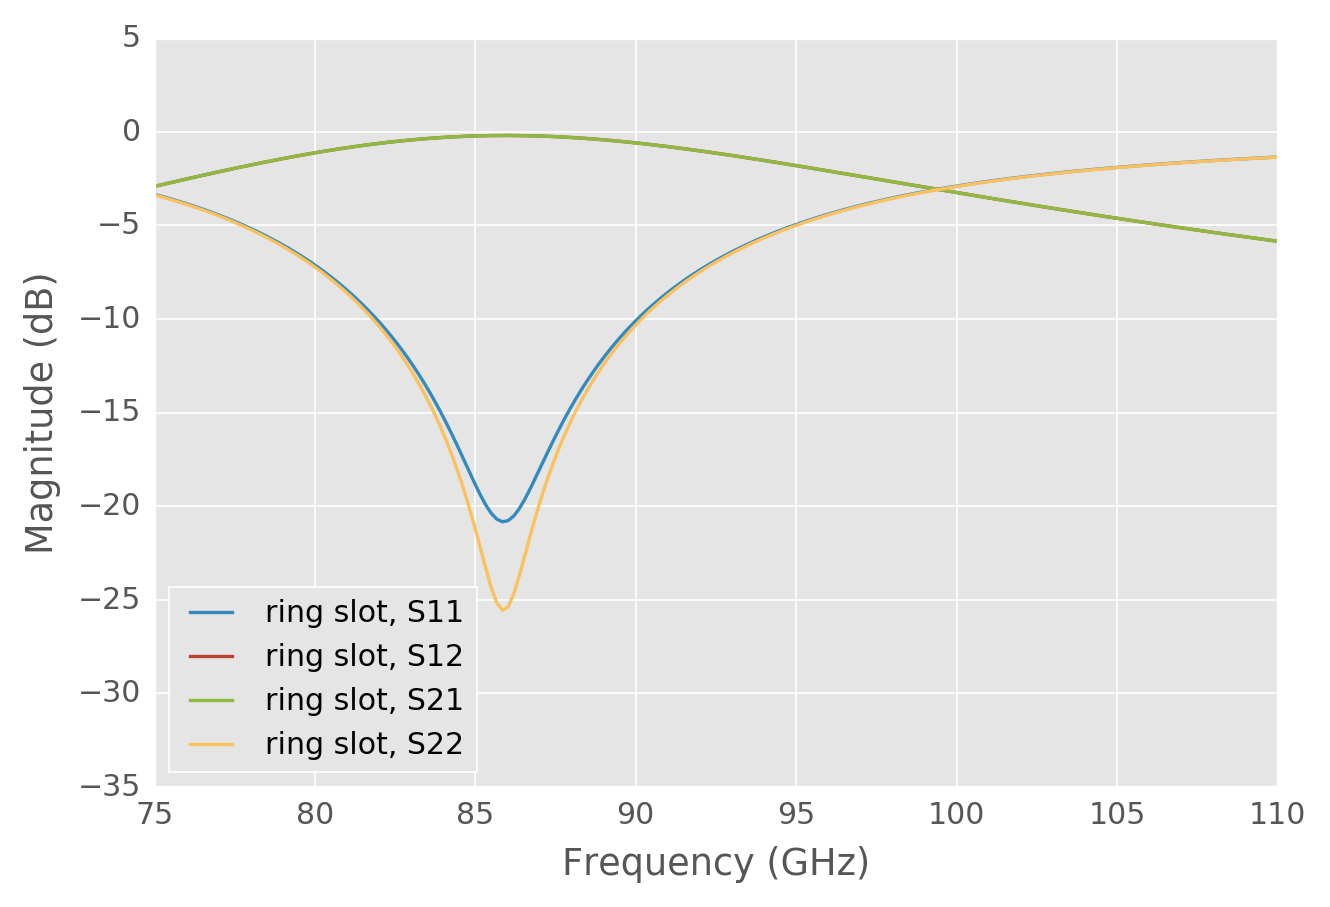

In [95]:
ring_slot.plot_s_db()

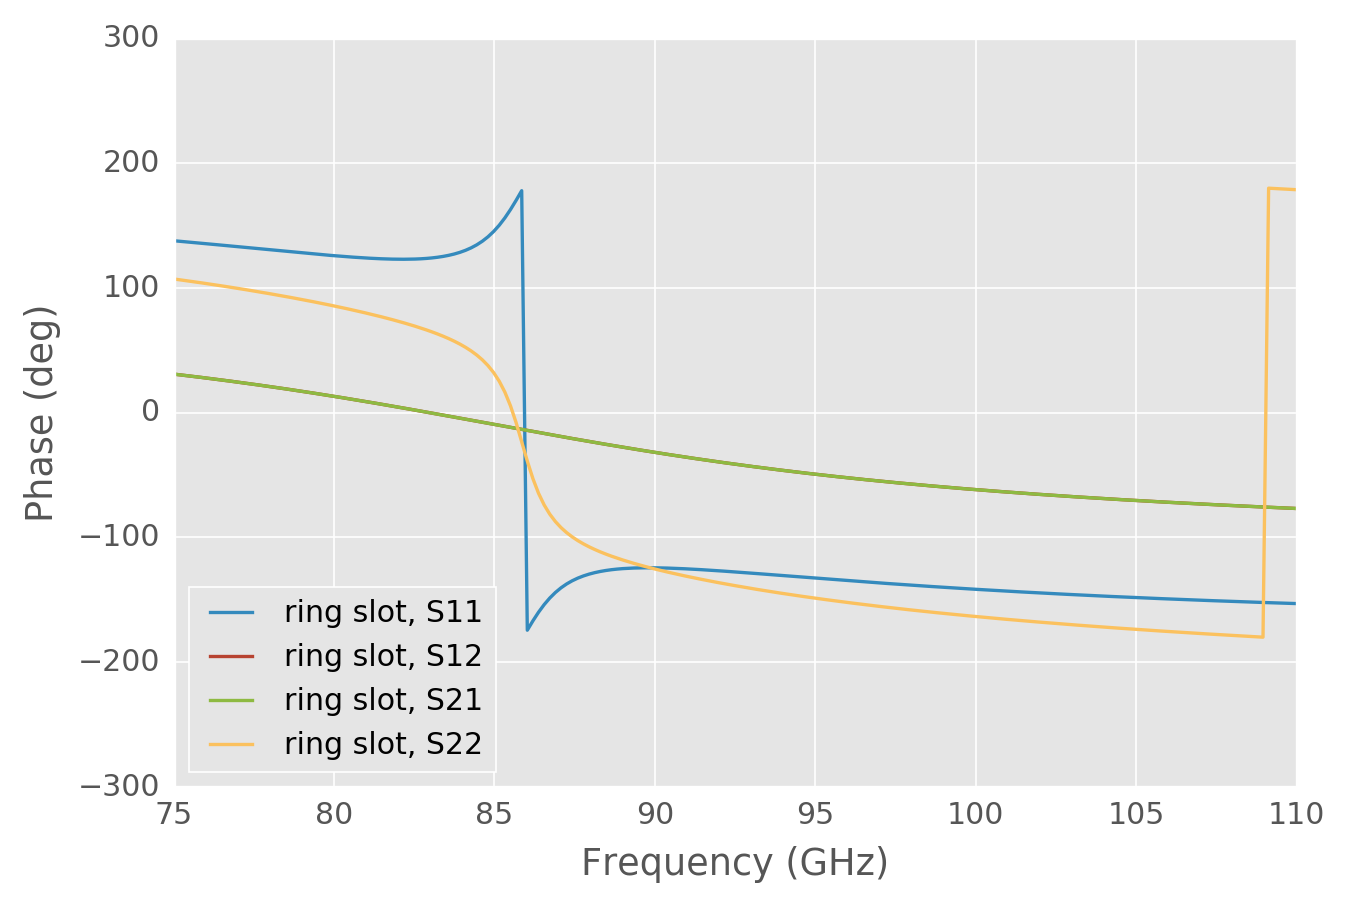

In [96]:
ring_slot.plot_s_deg()

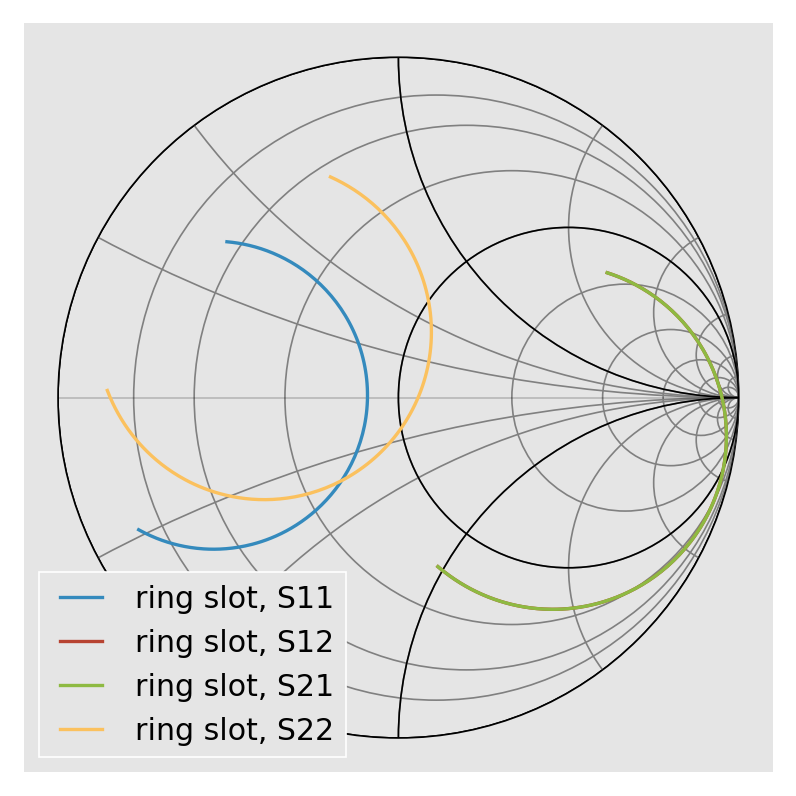

In [97]:
ring_slot.plot_s_smith()

For more detailed information about plotting see the  :doc:`plotting` tutorial

## NetworkSet 

The :class:`NetworkSet` object
represents an unordered  set of networks and provides  methods for 
calculating statistical quantities and displaying uncertainty bounds.

A :class:`NetworkSet` is created from a list or dict of 
:class:`Network`'s.  This can be done quickly with 
:func:`~skrf.io.general.read_all` , which loads all skrf-readable objects
in a directory. The argument ``contains`` is used to load only files 
which match a given substring. 

In [98]:
rf.read_all('data', contains='ro')

{'ro,1': 1-Port Network: 'ro,1',  500-750 GHz, 201 pts, z0=[ 50.+0.j],
 'ro,2': 1-Port Network: 'ro,2',  500-750 GHz, 201 pts, z0=[ 50.+0.j],
 'ro,3': 1-Port Network: 'ro,3',  500-750 GHz, 201 pts, z0=[ 50.+0.j]}

This can be passed directly to the :class:`~skrf.networkset.NetworkSet` constructor, 

In [99]:
ro_dict = rf.read_all(rf.data.pwd, contains='ro')
ro_ns = rf.NetworkSet(ro_dict, name='ro set') #name is optional
ro_ns

A NetworkSet of length 3

### Statistical Properties

Statistical quantities can be calculated by accessing 
properties of the NetworkSet. For example, to calculate the complex 
average of the set, access the ``mean_s`` property

In [100]:
ro_ns.mean_s

1-Port Network: 'ro set',  500-750 GHz, 201 pts, z0=[ 50.+0.j]

Similarly, to calculate the complex standard deviation of the set, 

In [101]:
ro_ns.std_s

1-Port Network: 'ro set',  500-750 GHz, 201 pts, z0=[ 50.+0.j]

These methods return a :class:`~skrf.network.Network` object, so the results can be 
saved or plotted in the same way as you would with a Network.
To plot the magnitude of the standard deviation of the set,  

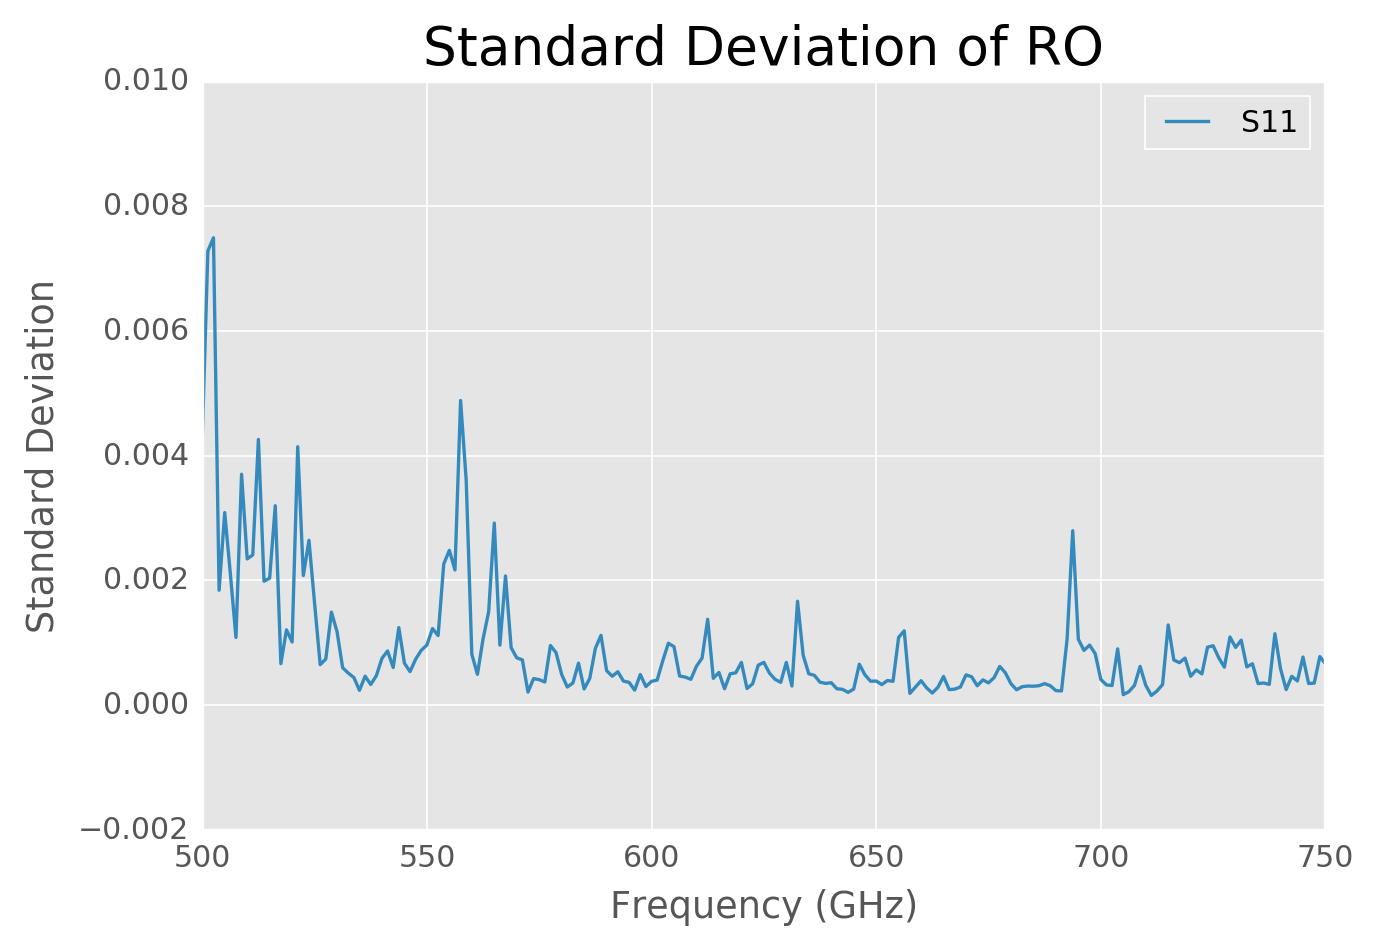

In [102]:
ro_ns.std_s.plot_s_mag(label='S11')
ylabel('Standard Deviation')
title('Standard Deviation of RO');

### Plotting Uncertainty Bounds

Uncertainty bounds on any network parameter can be plotted through the methods 

/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4670: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4671: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4674: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4676: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


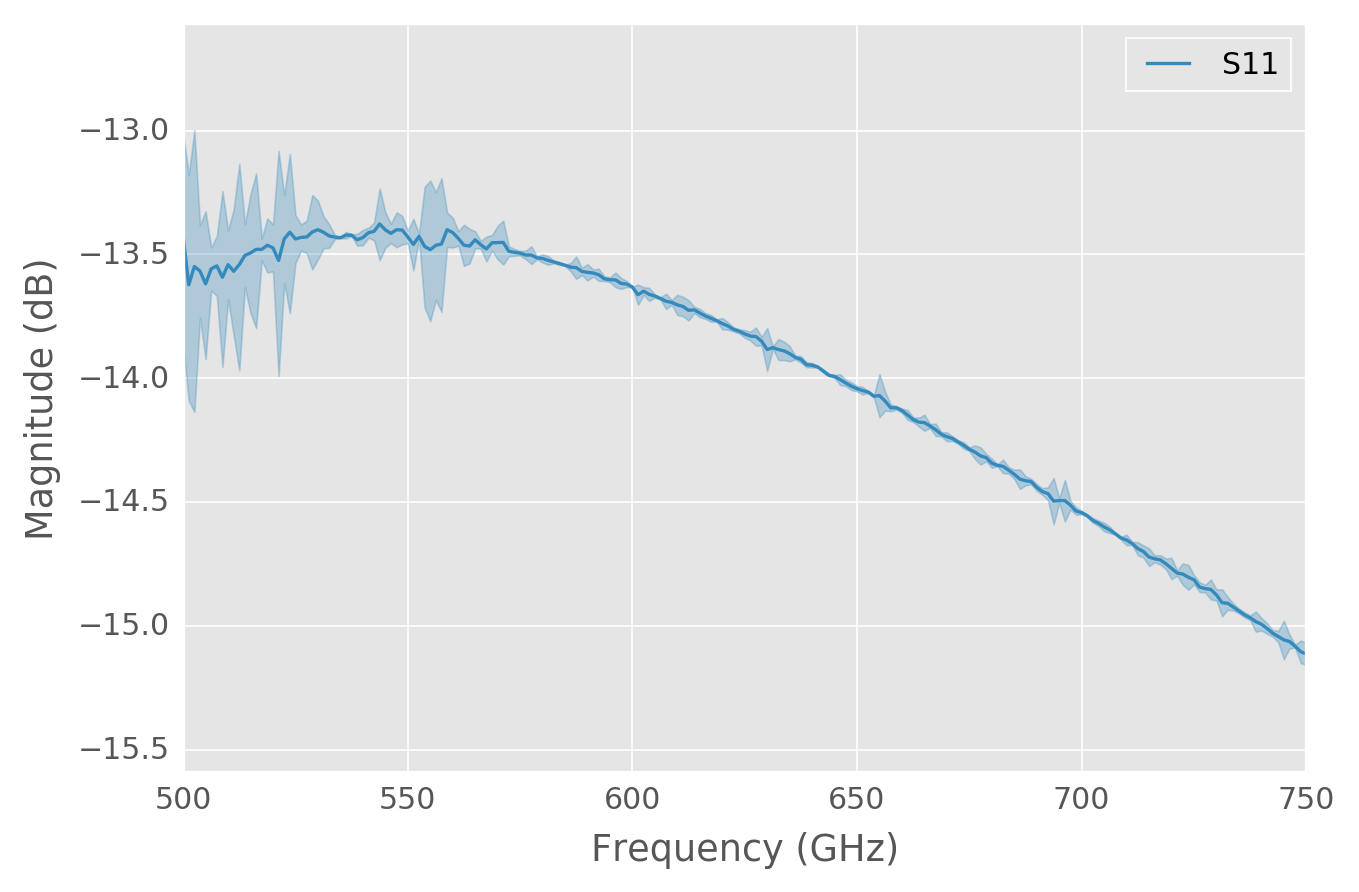

In [103]:
figure();
ro_ns.plot_uncertainty_bounds_s_db(label='S11');

See the :doc:`networkset` tutorial for more information.

## Virtual Instruments

    

The :mod:`~skrf.vi` module holds  classes
for GPIB/VISA instruments that are intricately related to skrf, mostly VNA's.
The VNA classes were created for the sole purpose of retrieving data 
so that calibration and measurements could be carried out offline by skrf, 
control of most other VNA capabilities is neglected.

* To use the virtual instrument classes you must have [pyvisa]( http://pyvisa.sourceforge.net/pyvisa/) installed.
    
A list of VNA's that have been are partially supported.

    
    * :class:`~vna.HP8510C`
    * :class:`~vna.HP8720`
    * :class:`~vna.PNA`
    * :class:`~vna.ZVA40`

An example usage of the :class:`~vna.HP8510C` class to retrieve some s-parameter data

    from skrf.vi import vna
    my_vna = vna.HP8510C(address =16) 
    #if an error is thrown at this point there is most likely a problem with your visa setup
        
    dut_1 = my_vna.s11
    dut_2 = my_vna.s21
    dut_3 = my_vna.two_port

Unfortunately, the syntax is different for every VNA class, so the
above example wont directly translate to other VNA's. Re-writing 
all of the VNA classes to follow the same convention is on the 
[TODO list] (https://github.com/scikit-rf/scikit-rf/blob/master/TODO.rst)


See the :doc:`virtualInstruments` tutorial for more information.

## Calibration

**skrf** has support for one and two-port calibration. **skrf**'s default calibration algorithms are generic in that they will work with any set of standards. If you supply more calibration standards than is needed, skrf will implement a simple least-squares solution. **skrf** does not currently support TRL.

Calibrations are performed through a :class:`Calibration` class. Creating
a :class:`Calibration` object requires at least two pieces of information:

*   a list of measured :class:`~skrf.network.Network`'s
*   a list of ideal :class:`~skrf.network.Network`'s

The :class:`~skrf.network.Network` elements in each list must all be similar (same #ports, frequency info, etc) and must be aligned to each other, meaning the first element of ideals list must correspond to the first element of measured list.

Optionally, other information can be provided when relevent such as,

*    calibration algorithm
*    enforce eciprocity of embedding networks
*    etc 

When this information is not provided skrf will determine it through 
inspection, or use a default value.

Below is an example script illustrating how to create a :class:`Calibration` .
See the :doc:`calibration` tutorial for more details and examples. 

### One Port Calibration

    import skrf as rf
    from skf.calibration import OnePort
    
    my_ideals = rf.read_all('ideals/')
    my_measured = rf.read_all('measured/')
    duts = rf.read_all('measured/')
    
    ## create a Calibration instance
    cal = rf.OnePort(\
        ideals = [my_ideals[k] for k in ['short','open','load']],
        measured = [my_measured[k] for k in ['short','open','load']],
        )
    
    caled_duts = [cal.apply_cal(dut) for dut in duts.values()]

## Media

**skrf** supports the  microwave network synthesis based on transmission line models. Network creation is accomplished through methods of the Media class, which represents a transmission line object for a given medium. Once constructed, a :class:`~media.Media` object contains the neccesary properties such as ``propagation constant`` and ``characteristic impedance``, that are needed to generate microwave circuits.

The basic usage looks something like this,  


In [104]:
freq = rf.Frequency(75,110,101,'ghz')
cpw = rf.media.CPW(freq, w=10e-6, s=5e-6, ep_r=10.6)
cpw.line(100*1e-6, name = '100um line')

/home/alex/code/scikit-rf/skrf/media/media.py:282: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return 1.0*theta/npy.imag(gamma[gamma.size/2])


2-Port Network: '100um line',  75-110 GHz, 101 pts, z0=[ 50.06074662+0.j  50.06074662+0.j]

### Media Types

Specific instances of Media objects can be created from relevant physical and 
electrical properties. Below is a list of mediums types supported by skrf,

### Network Components 

Here is a brief
list of some generic network components skrf supports,

Usage of these methods can is demonstrated below.

To create a 1-port network for a coplanar waveguide short (this neglects dicontinuity effects), 

In [105]:
cpw.short(name = 'short') 

1-Port Network: 'short',  75-110 GHz, 101 pts, z0=[ 50.06074662+0.j]

Or to create a $90^{\circ}$ section of cpw line, 

In [106]:
cpw.line(d=90,unit='deg', name='line')

/home/alex/code/scikit-rf/skrf/media/media.py:282: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return 1.0*theta/npy.imag(gamma[gamma.size/2])


2-Port Network: 'line',  75-110 GHz, 101 pts, z0=[ 50.06074662+0.j  50.06074662+0.j]

See :doc:`media` for more information about the Media object and network creation.



.. _ipython: http://ipython.scipy.org/moin/	
.. _QUCS: http://www.qucs.sourceforge.net